#Getting Started

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load the data
df = pd.read_csv("data-breast-cancer.csv", index_col=0)

In [3]:
# Show the first several data samples
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features: 

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.

#Exploratory Data Analysis

##Analyze the data

In [4]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 53.3+ KB


the data has no null value and contains only 1 categorical data feature

In [5]:
df.shape

(569, 11)

In [6]:
#drop duplicates
df = df.drop_duplicates(ignore_index=True)
df.shape 

(569, 11)

it seems like the data has no duplicates

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab4b0d92e0>,
      dtype=object)

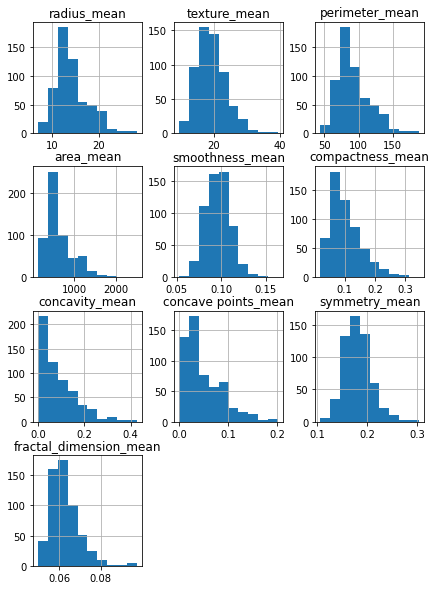

In [7]:
#visualize the distribution of data features
df.hist(figsize=(7,10))

we can see most of the data features follow the normal distribution while some skew to the right

<Figure size 432x288 with 0 Axes>

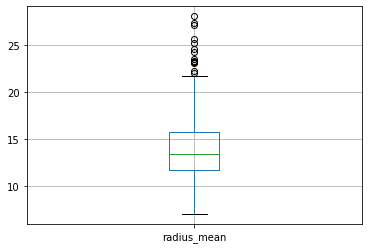

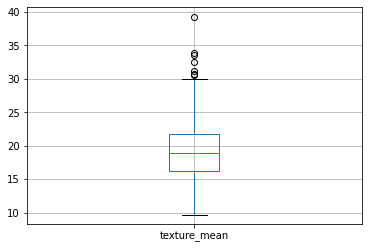

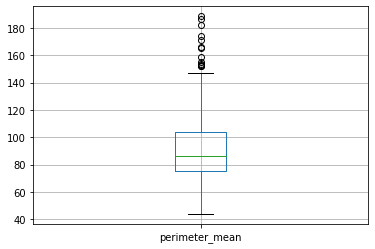

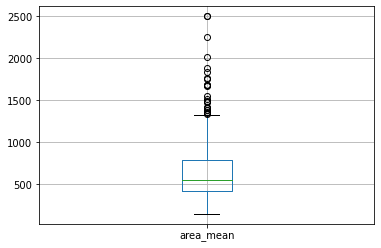

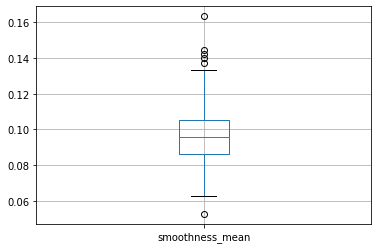

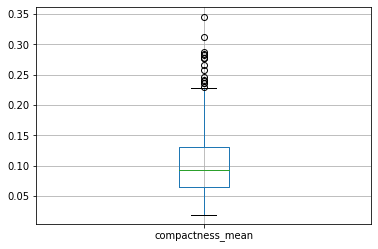

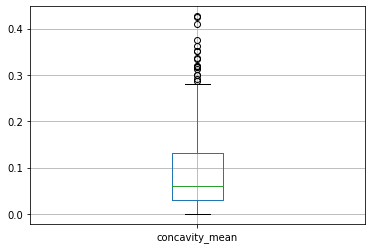

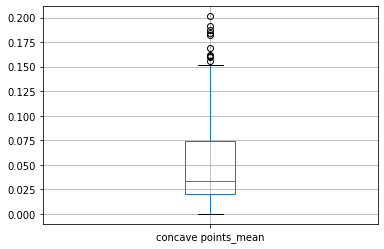

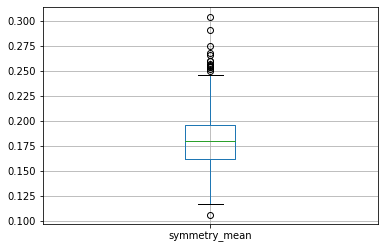

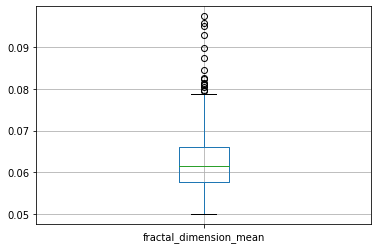

In [8]:
#plot boxplot to observe feature's distribution and outlier
for col in df.columns:
  plt.figure()
  if col != 'diagnosis':
    df.boxplot(column = col)

##Clean the data

In [9]:
# Let us take the whisker as :The 2nd percentile and the 98th percentile of the data" to remove data outliers.
 
# Remove outliers of all feature (except 'diagnosis')
for col in df.columns:
  if col != 'diagnosis':
    q = df[col].quantile(0.98) #select q range as 98%
    df_clean = df[df[col] < q]

df_clean.shape

(557, 11)

#Prepare train and test set

In [10]:
# Separate data features by removing the data label.
X = df_clean.drop(columns=["diagnosis"], axis=1)

# Assign data label to variable y
y = df_clean.diagnosis
y = y.map({'M': 1, 'B': 0}).astype(float) # Convert 'M' and 'B' to label 1 and 0.

# Split train/test with a random state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)

In [11]:
# Show some training samples
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.01796,0.1601,0.05541
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.03341,0.1776,0.06907
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,0.2113,0.07115
92,13.27,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.02648,0.1386,0.05318


In [12]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)     # Fit and transform thr training data
X_normalized_test = scaler.transform(X_test)           # Only transform the test data.

#Build SVM model

First, we build a SVM model with default parameters and see its performance

In [13]:
# SVC is C-Support Vector Classification and its implementation is based on libsvm. The multiclass support is handled according to a one-vs-one scheme.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
svmmodel = SVC()
svmmodel.fit(X_normalized_train, y_train)

SVC()

In [14]:
# Show evaluation metrics on the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, svmmodel.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        73
         1.0       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



the performance is actually quite good

##Model tuning

Now, let's tune parameter for to see how the model performs

In [15]:
# Choose parameters for tuning (default values of SVM: C=1, gamma=scale, kernel=rbf)
from sklearn.model_selection import GridSearchCV

### Hyper-parameter C is for soft margin SVM. 
# For a large value C, the optimization will chose smaller-margin hyperplane so that there are no misclassified samples in the training data.
# For a small value C, the optimization will chose larger-margin hyperplane even if there are misclassified samples in the training data.

### Hyper-parameter gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000],
              "gamma": ["scale", 0.001, 0.005, 0.1]}
gridsearch = GridSearchCV(SVC(), param_grid, cv=10, scoring="f1", verbose=1)     # cv: number of folds in cross validation.

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [16]:
# Run grid search to find the best set of hyper-parameters
gridsearch.fit(X_normalized_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 0.001, 0.005, 0.1]},
             scoring='f1', verbose=1)

In [17]:
#print the best parameters
gridsearch.best_params_

{'C': 1000, 'gamma': 0.005}

In [18]:
# Re-run SVM with the best set of hyper-parameters.
svmmodel_tuned = SVC(C=gridsearch.best_params_['C'], gamma=gridsearch.best_params_['gamma'])
svmmodel_tuned.fit(X_normalized_train, y_train)

SVC(C=1000, gamma=0.005)

In [19]:
# Show evaluation metrics on the test set
print(classification_report(y_test, svmmodel_tuned.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        73
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



it has surprisingly low f1-score

#Build Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model
logmodel.fit(X_normalized_train, y_train)  # Train the model

LogisticRegression()

In [21]:
# Show evaluation metrics on the test set
print(classification_report(y_test, logmodel.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        73
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



#Build Naive Bayes Model

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_model = GaussianNB() #initialize the Gaussian NB model
grid_search = {'var_smoothing': np.logspace(0,-9, num=100)} #tune params
nb_cv = GridSearchCV(naive_model, grid_search, cv=5)
nb_cv.fit(X_normalized_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [23]:
naive_model = GaussianNB(var_smoothing = nb_cv.best_params_['var_smoothing']) #initialize the model with the best value of hyper parameter var_smoothing
naive_model.fit(X_normalized_train, y_train) # train the naive bayes model

GaussianNB(var_smoothing=0.2848035868435802)

In [24]:
# Show evaluation metrics on the test set
print(classification_report(y_test, naive_model.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        73
         1.0       1.00      0.85      0.92        39

    accuracy                           0.95       112
   macro avg       0.96      0.92      0.94       112
weighted avg       0.95      0.95      0.95       112



#Build Decision Tree model

In [25]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5],                           # Maximum depth of the tree
         "min_samples_split": [4, 8]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [26]:
# Run the search on oversampled training data samples.
grid_search.fit(X_normalized_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [27]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [28]:
# Train the decision tree model
model_dt.fit(X_normalized_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [29]:
# Show evaluation metrics on the test set
print(classification_report(y_test, model_dt.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        73
         1.0       0.93      0.95      0.94        39

    accuracy                           0.96       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112



#Build Random Forest model

In [30]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on oversampled training data samples.
grid_search_rf.fit(X_normalized_train, y_train)     # Train the RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [31]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split']) 

In [32]:
# Train the Random Forest model
model_rf.fit(X_normalized_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_split=8, n_estimators=10,
                       random_state=1)

In [33]:
# Show evaluation metrics on the test set
print(classification_report(y_test, model_rf.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        73
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



#Evaluation between models

In [34]:
# Show evaluation metrics of SVM model on the test set
print(classification_report(y_test, svmmodel_tuned.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        73
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



In [35]:
# Show evaluation metrics of logistic regression model on the test set
print(classification_report(y_test, logmodel.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        73
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



In [36]:
# Show evaluation metrics of Gaussian Naive Bayes model on the test set
print(classification_report(y_test, naive_model.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        73
         1.0       1.00      0.85      0.92        39

    accuracy                           0.95       112
   macro avg       0.96      0.92      0.94       112
weighted avg       0.95      0.95      0.95       112



In [37]:
# Show evaluation metrics of Decision Tree model on the test set
print(classification_report(y_test, model_dt.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        73
         1.0       0.93      0.95      0.94        39

    accuracy                           0.96       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112



In [38]:
# Show evaluation metrics of Random Forest model on the test set
print(classification_report(y_test, model_rf.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        73
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



All of the models perform quite well. SVM, Logistic regression and Random Forest have the highest scores for this test set.